In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from qbm import QBM, Duality
from tqdm import tqdm

# matplotlib styling
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = '12'

In [2]:
s1 = QBM(16)
d1 = Duality(s1)
s2 = QBM(17)
d2 = Duality(s2)

100%|██████████| 17/17 [00:00<00:00, 30.19it/s]


In [3]:
pcs = lambda k, d: d.plot_compare_states(
    d.h_pqs[-1-k], d.s.move_hs(k, (d.N//2, d.N//2)), k
)

In [5]:
H1= s1.H['H']

In [9]:
def wfplot(s, k):
    plt.plot(np.power(np.abs(s.move_hs(k, (s.N//2, s.N//2), False)), 2), 'k', label = 'shifted')
    plt.plot(np.power(np.abs(s.harper_states['evecs'][-1-k]), 2), 'r--', label='original')
    plt.legend()
    plt.show()

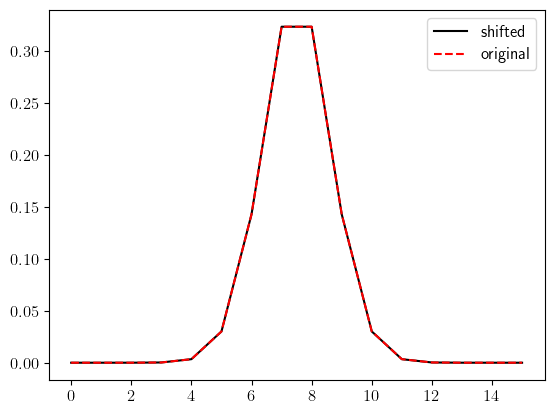

In [10]:
wfplot(s1, 0)

In [13]:
def esh(k, s):
    sh = s.move_hs(k, (s.N//2, s.N//2), False)
    H = s.H['H']
    return np.mean((H @ sh / sh).real)
eog = lambda k, s: s.harper_states['evals'][-1-k].real

In [14]:
print("shifted", "\t\t", "original")
for _ in range(s1.N):
    print(esh(_, s1),'\t', eog(_, s1))

shifted 		 original
3.813148013246245 	 3.813148013247556
3.457867779176781 	 3.4578677791767887
3.138654176285296 	 3.1386541762851836
2.854384634158621 	 2.8543846341586234
2.602474875619972 	 2.602474875619984
2.392543135811647 	 2.392543135811651
2.1837668455806023 	 2.1837668455805996
2.098858694487185 	 2.0988586944871894
1.9011413055128048 	 1.9011413055128115
1.8162331544194026 	 1.8162331544193986
1.6074568641883458 	 1.6074568641883455
1.3975251243799938 	 1.397525124380011
1.1456153658413946 	 1.1456153658413837
0.861345823714923 	 0.8613458237148096
0.5421322208230606 	 0.5421322208232126
0.18685198675089174 	 0.1868519867524424


In [15]:
np.mean(((H1 @ st0) / st0).real)

3.813148013246245

In [16]:
s1.harper_states['evals'][-1].real

3.813148013247556

In [19]:
ph = lambda d: [
    np.round(
        d.k_phase(_, False)/np.pi, 10
        ) for _ in range(d.N)
    ]

ph_ = lambda d: [
    np.round(
        d.k_phase(_, True), 10
        ) for _ in range(d.N)
    ]

In [20]:
ph(d1)

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 -0.5,
 0.5,
 -0.5,
 0.5,
 -0.5,
 0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5]

In [21]:
np.abs(ph_(d2))

array([0.95477523, 0.86621496, 0.78113762, 0.69882206, 0.61812689,
       0.53691408, 0.45179742, 0.36488567, 0.63719292, 0.36488567,
       0.45179742, 0.53691408, 0.61812689, 0.69882206, 0.78113762,
       0.86621496, 0.95477523])

In [22]:
np.angle(ph_(d2))

array([ 0.87779795, -2.26379471,  0.87779795,  0.87779795,  0.87779795,
       -2.26379471,  0.87779795,  0.87779795, -1.47839654, -0.69299838,
       -0.69299838,  2.44859427, -0.69299838, -0.69299838, -0.69299838,
        2.44859427, -0.69299838])

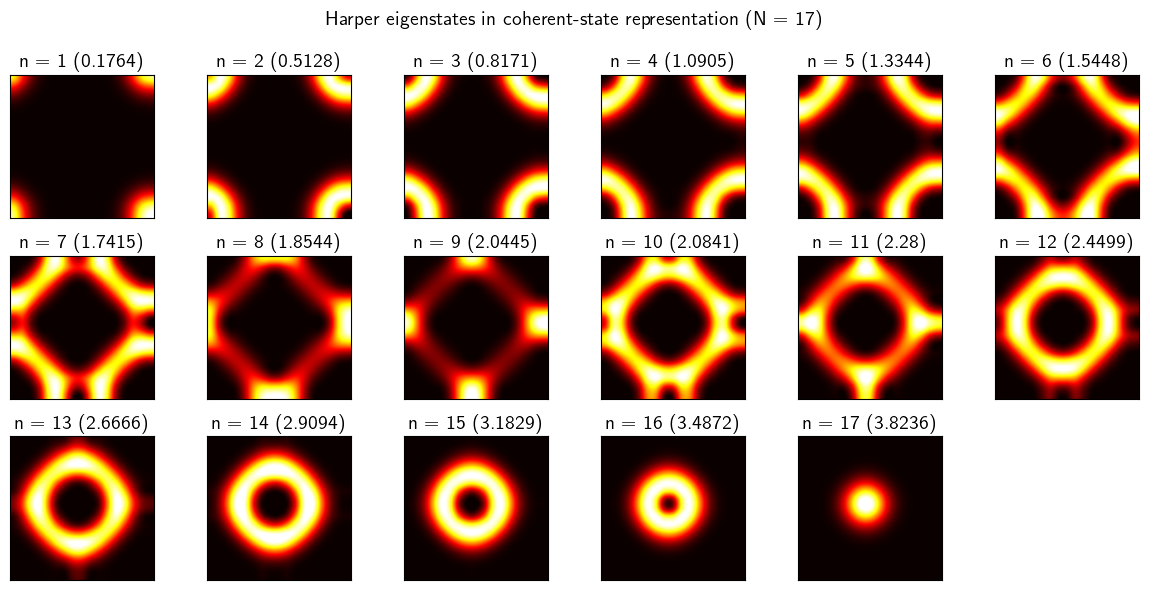

In [23]:
d2.plot_harper_states(nc = 6)

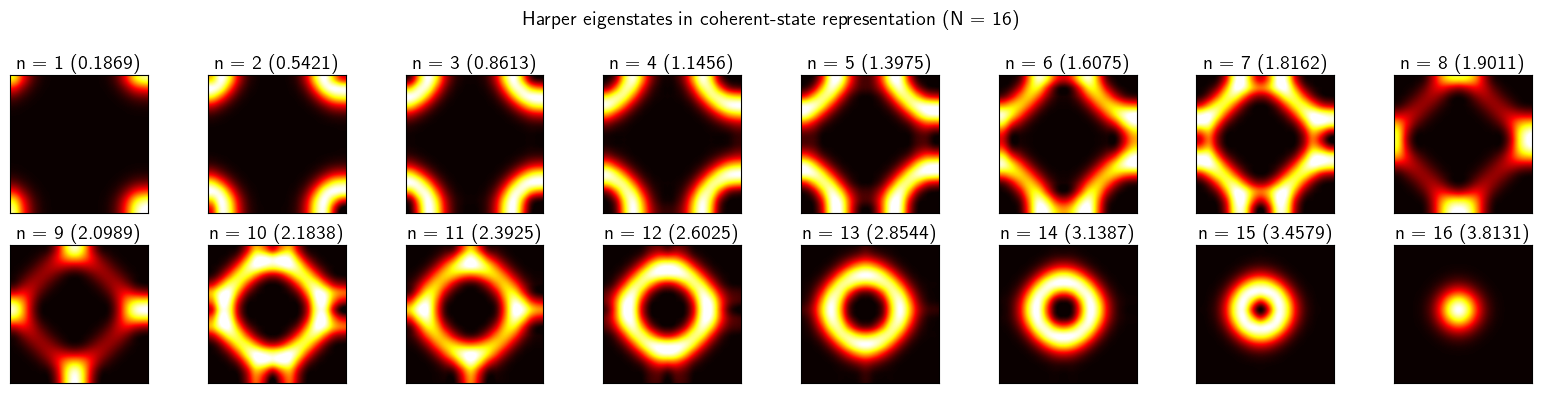

In [24]:
d1.plot_harper_states(nc = 8)

# UV commutation

In [25]:
U = d1.s.UV["U"]
V = d1.s.UV["V"]

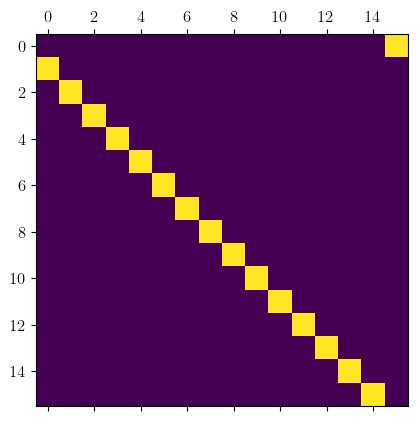

In [26]:
plt.matshow(np.abs(U @ V))
plt.show()

In [27]:
fac = np.exp(-1j*2*np.pi/16)

In [28]:
U@V == fac*(V@U)

matrix([[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False, False, False,  True, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         Fa

In [32]:
np.round(U @ V, 10) == np.round(fac*(V@U), 10)

matrix([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          T

In [34]:
T = d1.s.T_pq(8, 8)

In [40]:
H = d1.s.H["H"]

In [47]:
from numpy.linalg import matrix_power as mp
from numpy.linalg import inv

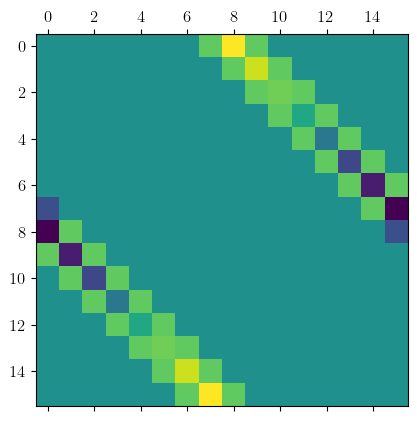

In [45]:
plt.matshow(np.abs(np.round(
    np.exp(1j*4*np.pi)*(mp(U, 8) @ (2 + U + U.H - V - V.H) @ mp(V.H, 8)), 10
)))
plt.show()

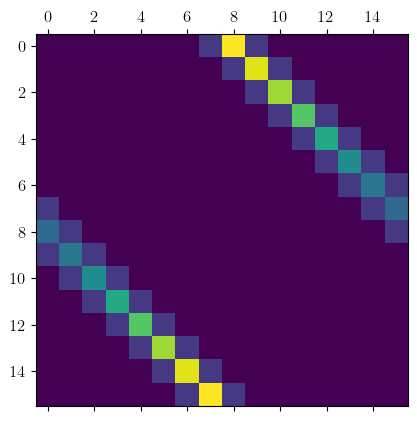

In [51]:
plt.matshow(np.abs(np.round(
    T @ H,
    10
)))
plt.show()

In [ ]:
np.real

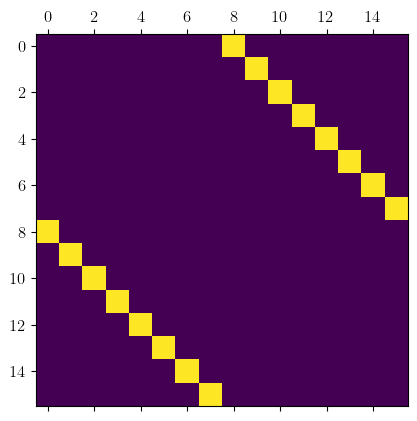

In [57]:
plt.matshow(np.abs(np.round(
    T@H + H@T,
    10
)))
plt.show()

In [59]:
def comp_matrices(A, B):
    return np.round(A) == np.round(B)

In [60]:
comp_matrices(
    T@H + H@T,
    4*np.exp(1j*4*np.pi)*(mp(U, 8) @ mp(V.H, 8))
)

matrix([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          T

In [61]:
comp_matrices(
    T@H - H@T,
    np.exp(1j*4*np.pi)*(mp(U, 8) @ (U + U.H - V - V.H) @ mp(V.H, 8))
)

matrix([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          T

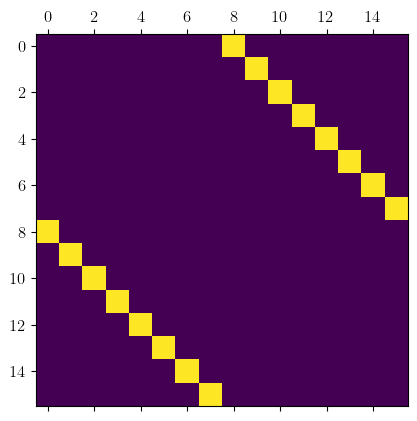

In [58]:
plt.matshow(np.abs(np.round(
    4*np.exp(1j*4*np.pi)*(mp(U, 8) @ mp(V.H, 8)),
    10
)))
plt.show()

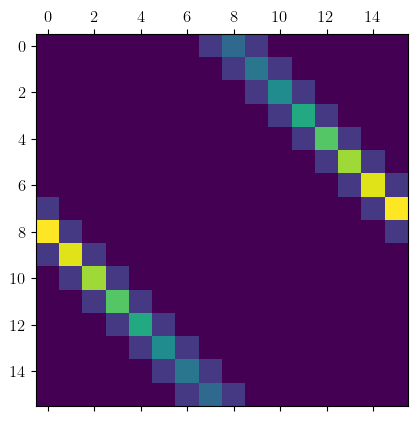

In [56]:
plt.matshow(np.abs(np.round(
    H @ T,
    10
)))
plt.show()

In [50]:
np.round(inv(U),10) == np.round(U.H)

matrix([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          T

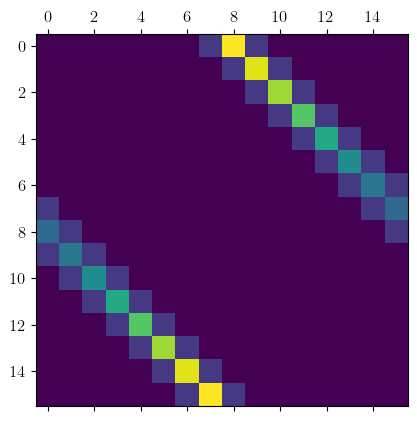

In [46]:
plt.matshow(np.abs(np.round(
    T @ H, 10
)))
plt.show()

In [42]:
np.round(T @ H) == np.round(np.exp(1j*4*np.pi)*(mp(U, 8) @ (2 + U + U.H - V - V.H) @ mp(V.H, 8)), 10)

matrix([[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False, False,
         Fa

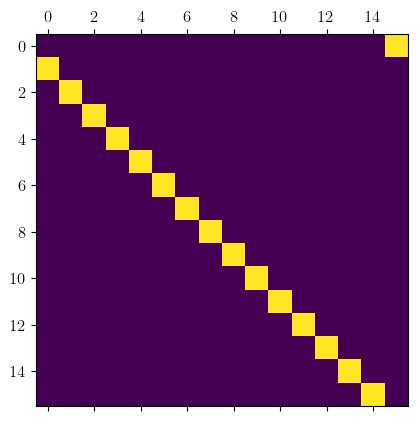

In [29]:
plt.matshow(np.abs(V @ U))
plt.show()